In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Africa


In [3]:
africa= pd.read_csv('Continents/Africa.csv')
africa.head(100)

,title,rank,date,artist,url,region,chart,trend,streams,continent
0,دورك جي,1,2020-05-01,Wegz,https://open.spotify.com/track/4fc6Ed7qOGdCKbf...,Egypt,top200,SAME_POSITION,7889.0,Africa
1,THE SCOTTS,2,2020-05-01,"THE SCOTTS, Travis Scott, Kid Cudi",https://open.spotify.com/track/39Yp9wwQiSRIDOv...,Egypt,top200,SAME_POSITION,6757.0,Africa
2,goosebumps,3,2020-05-01,Travis Scott,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,Egypt,top200,MOVE_UP,5272.0,Africa
3,SICKO MODE,4,2020-05-01,Travis Scott,https://open.spotify.com/track/2xLMifQCjDGFmkH...,Egypt,top200,MOVE_DOWN,5068.0,Africa
4,HIGHEST IN THE ROOM,5,2020-05-01,Travis Scott,https://open.spotify.com/track/3eekarcy7kvN4yt...,Egypt,top200,SAME_POSITION,4136.0,Africa
...,...,...,...,...,...,...,...,...,...,...
95,Falling,15,2020-05-01,Trevor Daniel,https://open.spotify.com/track/2rRJrJEo19S2J82...,Morocco,top200,MOVE_DOWN,2455.0,Africa
96,death bed (coffee for your head),16,2020-05-01,"Powfu, beabadoobee",https://open.spotify.com/track/7eJMfftS33KTjuF...,Morocco,top200,MOVE_UP,2437.0,Africa
97,VitamineDZ,17,2020-05-01,ElGrandeToto,https://open.spotify.com/track/52X7AoBCW2cOweH...,Morocco,top200,MOVE_DOWN,2434.0,Africa
98,Chicago Freestyle (feat. Giveon),18,2020-05-01,Drake,https://open.spotify.com/track/4wVOKKEHUJxHCFF...,Morocco,top200,NEW_ENTRY,2371.0,Africa


In [4]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671252 entries, 0 to 671251
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   title      671252 non-null  object 
 1   rank       671252 non-null  int64  
 2   date       671252 non-null  object 
 3   artist     671252 non-null  object 
 4   url        671252 non-null  object 
 5   region     671252 non-null  object 
 6   chart      671252 non-null  object 
 7   trend      671252 non-null  object 
 8   streams    488813 non-null  float64
 9   continent  671252 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 51.2+ MB


In [5]:

Title = []
Feature = []
africa['title'] = africa['title'].astype(str)

for i in africa['title']:
    if '(feat.' in i:
        new = i.split('(feat.')
        title = new[0]
        feature = new[1].split(')')[0]  # Extract the feature part
        Title.append(title)
        Feature.append(feature)
    else:
        Title.append(i)
        Feature.append("None")

# Remove '[' and ']' and split the feature string by ','
Feature = [f.replace('[', '').replace(']', '').replace(',', '').strip() if f != "None" else f for f in Feature]



In [6]:
africa['title'] = Title
#create feature column at the 5th column
africa.insert(5, "feature", Feature, True)
africa.head(100)

,title,rank,date,artist,url,feature,region,chart,trend,streams,continent
0,دورك جي,1,2020-05-01,Wegz,https://open.spotify.com/track/4fc6Ed7qOGdCKbf...,None,Egypt,top200,SAME_POSITION,7889.0,Africa
1,THE SCOTTS,2,2020-05-01,"THE SCOTTS, Travis Scott, Kid Cudi",https://open.spotify.com/track/39Yp9wwQiSRIDOv...,None,Egypt,top200,SAME_POSITION,6757.0,Africa
2,goosebumps,3,2020-05-01,Travis Scott,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,None,Egypt,top200,MOVE_UP,5272.0,Africa
3,SICKO MODE,4,2020-05-01,Travis Scott,https://open.spotify.com/track/2xLMifQCjDGFmkH...,None,Egypt,top200,MOVE_DOWN,5068.0,Africa
4,HIGHEST IN THE ROOM,5,2020-05-01,Travis Scott,https://open.spotify.com/track/3eekarcy7kvN4yt...,None,Egypt,top200,SAME_POSITION,4136.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
95,Falling,15,2020-05-01,Trevor Daniel,https://open.spotify.com/track/2rRJrJEo19S2J82...,None,Morocco,top200,MOVE_DOWN,2455.0,Africa
96,death bed (coffee for your head),16,2020-05-01,"Powfu, beabadoobee",https://open.spotify.com/track/7eJMfftS33KTjuF...,None,Morocco,top200,MOVE_UP,2437.0,Africa
97,VitamineDZ,17,2020-05-01,ElGrandeToto,https://open.spotify.com/track/52X7AoBCW2cOweH...,None,Morocco,top200,MOVE_DOWN,2434.0,Africa
98,Chicago Freestyle,18,2020-05-01,Drake,https://open.spotify.com/track/4wVOKKEHUJxHCFF...,Giveon,Morocco,top200,NEW_ENTRY,2371.0,Africa


In [7]:
africa = africa.drop(columns=['url'])
africa= africa.drop(columns='trend')
#chage the datatype of data column to datetime
africa['date'] = pd.to_datetime(africa['date'])
africa.drop(africa[africa['chart'].str.contains('viral50')].index, inplace=True)
africa.isnull().sum()

title        0
rank         0
date         0
artist       0
feature      0
region       0
chart        0
streams      0
continent    0
dtype: int64

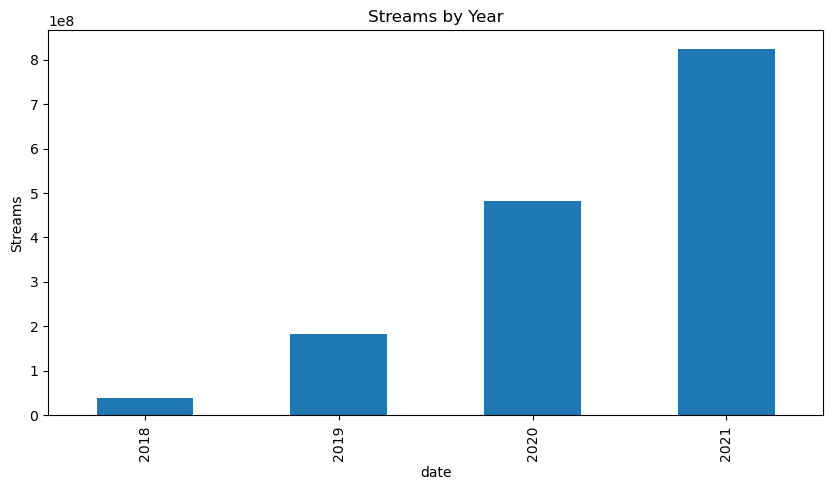

In [8]:
#visualize bar chart for date and streams, where group the date by years 
africa.groupby(africa['date'].dt.year)['streams'].sum().plot(kind='bar', figsize=(10,5))
plt.ylabel('Streams')
plt.title('Streams by Year')
plt.show()


In [9]:
africa.head(10)

,title,rank,date,artist,feature,region,chart,streams,continent
0,دورك جي,1,2020-05-01,Wegz,None,Egypt,top200,7889.0,Africa
1,THE SCOTTS,2,2020-05-01,"THE SCOTTS, Travis Scott, Kid Cudi",None,Egypt,top200,6757.0,Africa
2,goosebumps,3,2020-05-01,Travis Scott,None,Egypt,top200,5272.0,Africa
3,SICKO MODE,4,2020-05-01,Travis Scott,None,Egypt,top200,5068.0,Africa
4,HIGHEST IN THE ROOM,5,2020-05-01,Travis Scott,None,Egypt,top200,4136.0,Africa
5,واحد وعشرين,6,2020-05-01,Wegz,None,Egypt,top200,3905.0,Africa
6,Roses - Imanbek Remix,7,2020-05-01,SAINt JHN,None,Egypt,top200,3536.0,Africa
7,Toosie Slide,8,2020-05-01,Drake,None,Egypt,top200,3104.0,Africa
8,The Box,9,2020-05-01,Roddy Ricch,None,Egypt,top200,2843.0,Africa
9,Asyad El Balad,10,2020-05-01,"Wegz, Savage Plug",None,Egypt,top200,2772.0,Africa


In [10]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488813 entries, 0 to 622560
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      488813 non-null  object        
 1   rank       488813 non-null  int64         
 2   date       488813 non-null  datetime64[ns]
 3   artist     488813 non-null  object        
 4   feature    488813 non-null  object        
 5   region     488813 non-null  object        
 6   chart      488813 non-null  object        
 7   streams    488813 non-null  float64       
 8   continent  488813 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 37.3+ MB


In [11]:

africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488813 entries, 0 to 622560
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      488813 non-null  object        
 1   rank       488813 non-null  int64         
 2   date       488813 non-null  datetime64[ns]
 3   artist     488813 non-null  object        
 4   feature    488813 non-null  object        
 5   region     488813 non-null  object        
 6   chart      488813 non-null  object        
 7   streams    488813 non-null  float64       
 8   continent  488813 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 37.3+ MB


In [12]:
# for check for chart= viral50
africa[africa['chart']=='viral50'].head(100)

,title,rank,date,artist,feature,region,chart,streams,continent


In [13]:
#check for date range
africa['date'].min(), africa['date'].max()

(Timestamp('2018-04-20 00:00:00'), Timestamp('2021-11-30 00:00:00'))

In [14]:
year = africa['date'].dt.year
africa.insert(5, "year", year, True)

month = africa['date'].dt.month
africa.insert(6, "month", month, True)

day = africa['date'].dt.day
africa.insert(7, "day", day, True)


 # Drop the original 'date' column
africa = africa.drop(columns=['date'])

africa.head()

,title,rank,artist,feature,year,month,day,region,chart,streams,continent
0,دورك جي,1,Wegz,None,2020,5,1,Egypt,top200,7889.0,Africa
1,THE SCOTTS,2,"THE SCOTTS, Travis Scott, Kid Cudi",None,2020,5,1,Egypt,top200,6757.0,Africa
2,goosebumps,3,Travis Scott,None,2020,5,1,Egypt,top200,5272.0,Africa
3,SICKO MODE,4,Travis Scott,None,2020,5,1,Egypt,top200,5068.0,Africa
4,HIGHEST IN THE ROOM,5,Travis Scott,None,2020,5,1,Egypt,top200,4136.0,Africa
